# 서울시 코로나19 확진자 현황 API

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
with open('../static/data/seoul_api_key.txt', mode='r') as key_fd:
    seoulapi_key = key_fd.read(100)

In [3]:
corona_url = 'http://openapi.seoul.go.kr:8088'
type = 'xml'
start_index = 1
end_index = 1000
url = f'{corona_url}/{seoulapi_key}/{type}/Corona19Status/{start_index}/{end_index}'

In [4]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
resultCode = soup.find('RESULT').find('CODE').get_text()
if resultCode == 'INFO-000':
    list_total_count = int(soup.find('list_total_count').get_text())
    print(list_total_count)
else:
    print(soup.find('RESULT').find('MESSAGE').get_text())

23459


In [5]:
list_total_count = int(soup.find('list_total_count').get_text())
list_total_count

23459

In [6]:
items = soup.find_all('row')

In [7]:
id_list, date_list, no_list, country_list = [],[],[],[]
personal_list, area_list, travel_list, contact_list = [],[],[],[]
corrective_list, status_list, moving_list, idate_list = [],[],[],[]
mdate_list = []
for item in items:
    id_list.append(item.find('CORONA19_ID').string)
    date_list.append(item.find('CORONA19_DATE').string)
    no_list.append(item.find('CORONA19_NO').string)
    country_list.append(item.find('CORONA19_COUNTRY').string)
    personal_list.append(item.find('CORONA19_PERSONAL').string)
    area_list.append(item.find('CORONA19_AREA').string)
    travel_list.append(item.find('CORONA19_TRAVEL_HISTORY').string)
    contact_list.append(item.find('CORONA19_CONTACT_HISTORY').string)
    corrective_list.append(item.find('CORONA19_CORRECTIVE').string)
    status_list.append(item.find('CORONA19_LEAVE_STATUS').string)
    moving_list.append(item.find('CORONA19_MOVING_PATH').string)
    idate_list.append(item.find('CORONA19_IDATE').string)
    mdate_list.append(item.find('CORONA19_MDATE').string)

df = pd.DataFrame({
    '연번':id_list, '확진일':date_list, '환자번호':no_list, '국적':country_list,
    '환자정보':personal_list, '지역':area_list, '여행력':travel_list,
    '접촉력':contact_list, '조치사항':corrective_list, '상태':status_list, 
    '이동경로':moving_list, '등록일':idate_list, '수정일':mdate_list
})
df.tail()

연번         확진일  환자번호    국적  환자정보   지역   여행력              접촉력  조치사항  \
995  22464  2021-01-16  None  None  None  종로구  None  종로구 소재 요양시설2 관련  None   
996  22463  2021-01-16  None  None  None  종로구  None        기타 확진자 접촉  None   
997  22462  2021-01-16  None  None  None  은평구  None        기타 확진자 접촉  None   
998  22461  2021-01-16  None  None  None  은평구  None        기타 확진자 접촉  None   
999  22460  2021-01-16  None  None  None  은평구  None    은평구 소재 병원3 관련  None   

       상태  이동경로                  등록일                  수정일  
995  None  None  2021-01-25 09:35:37  2021-01-25 09:35:37  
996  None  None  2021-01-25 09:35:37  2021-01-25 09:35:37  
997  None  None  2021-01-25 09:35:37  2021-01-25 09:35:37  
998  None  None  2021-01-25 09:35:37  2021-01-25 09:35:37  
999  None  None  2021-01-25 09:35:37  2021-01-25 09:35:37

In [8]:
df.head()

연번         확진일  환자번호    국적  환자정보   지역   여행력         접촉력  조치사항    상태  \
0  23459  2021-01-24  None  None  None  타시도  None    감염경로 조사중  None  None   
1  23458  2021-01-24  None  None  None  관악구  None  타시도 확진자 접촉  None  None   
2  23457  2021-01-24  None  None  None  관악구  None   기타 확진자 접촉  None  None   
3  23456  2021-01-24  None  None  None  종로구  None   병원 및 요양시설  None  None   
4  23455  2021-01-24  None  None  None  강동구  None   기타 확진자 접촉  None  None   

   이동경로                  등록일                  수정일  
0  None  2021-01-25 09:35:39  2021-01-25 09:35:39  
1  None  2021-01-25 09:35:39  2021-01-25 09:35:39  
2  None  2021-01-25 09:35:39  2021-01-25 09:35:39  
3  None  2021-01-25 09:35:39  2021-01-25 09:35:39  
4  None  2021-01-25 09:35:39  2021-01-25 09:35:39

### 모든 데이터에 대해 처리

In [9]:
from tqdm import tqdm_notebook

In [10]:
id_list, date_list, no_list, country_list = [],[],[],[]
personal_list, area_list, travel_list, contact_list = [],[],[],[]
corrective_list, status_list, moving_list, idate_list = [],[],[],[]
mdate_list = []
for i in tqdm_notebook(range(1, list_total_count, 1000)):
    start_index = i
    end_index = i+1000-1 if i+1000-1<list_total_count else list_total_count
    url = f'{corona_url}/{seoulapi_key}/{type}/Corona19Status/{start_index}/{end_index}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'xml')
    items = soup.find_all('row')

    for item in items:
        id_list.append(item.find('CORONA19_ID').string)
        date_list.append(item.find('CORONA19_DATE').string)
        no_list.append(item.find('CORONA19_NO').string)
        country_list.append(item.find('CORONA19_COUNTRY').string)
        personal_list.append(item.find('CORONA19_PERSONAL').string)
        area_list.append(item.find('CORONA19_AREA').string)
        travel_list.append(item.find('CORONA19_TRAVEL_HISTORY').string)
        contact_list.append(item.find('CORONA19_CONTACT_HISTORY').string)
        corrective_list.append(item.find('CORONA19_CORRECTIVE').string)
        status_list.append(item.find('CORONA19_LEAVE_STATUS').string)
        moving_list.append(item.find('CORONA19_MOVING_PATH').string)
        idate_list.append(item.find('CORONA19_IDATE').string)
        mdate_list.append(item.find('CORONA19_MDATE').string)


In [11]:
df = pd.DataFrame({
    '연번':id_list, '확진일':date_list, '환자번호':no_list, '국적':country_list,
    '환자정보':personal_list, '지역':area_list, '여행력':travel_list,
    '접촉력':contact_list, '조치사항':corrective_list, '상태':status_list, 
    '이동경로':moving_list, '등록일':idate_list, '수정일':mdate_list
})
df.tail()

연번         확진일  환자번호    국적  환자정보   지역   여행력        접촉력  조치사항  상태  \
23454  5  2020-01-31  None  None  None  성북구  None  기타 확진자 접촉  None  퇴원   
23455  4  2020-01-30  None  None  None  마포구    중국       해외유입  None  퇴원   
23456  3  2020-01-30  None  None  None  종로구  None   종로구 집단발병  None  퇴원   
23457  2  2020-01-30  None  None  None  중랑구    중국       해외유입  None  퇴원   
23458  1  2020-01-24  None  None  None  강서구    중국       해외유입  None  퇴원   

               이동경로                  등록일                  수정일  
23454  이동경로 공개기간 경과  2021-01-14 11:16:47  2021-01-23 11:05:51  
23455  이동경로 공개기간 경과  2021-01-14 11:16:47  2021-01-23 11:05:51  
23456  이동경로 공개기간 경과  2021-01-14 11:16:47  2021-01-23 11:05:51  
23457  이동경로 공개기간 경과  2021-01-14 11:16:47  2021-01-23 11:05:51  
23458  이동경로 공개기간 경과  2021-01-14 11:16:47  2021-01-23 11:05:51

In [13]:
df.to_csv('../static/tmp/covid-seoul.csv', index=False)

In [30]:
df = pd.read_csv('../static/tmp/covid-seoul.csv')

In [31]:
df['연번'] = df['연번'].astype(int)
df.head()

연번         확진일  환자번호  국적  환자정보   지역  여행력         접촉력  조치사항   상태 이동경로  \
0  23459  2021-01-24   NaN NaN   NaN  타시도  NaN    감염경로 조사중   NaN  NaN  NaN   
1  23458  2021-01-24   NaN NaN   NaN  관악구  NaN  타시도 확진자 접촉   NaN  NaN  NaN   
2  23457  2021-01-24   NaN NaN   NaN  관악구  NaN   기타 확진자 접촉   NaN  NaN  NaN   
3  23456  2021-01-24   NaN NaN   NaN  종로구  NaN   병원 및 요양시설   NaN  NaN  NaN   
4  23455  2021-01-24   NaN NaN   NaN  강동구  NaN   기타 확진자 접촉   NaN  NaN  NaN   

                   등록일                  수정일  
0  2021-01-25 09:35:39  2021-01-25 09:35:39  
1  2021-01-25 09:35:39  2021-01-25 09:35:39  
2  2021-01-25 09:35:39  2021-01-25 09:35:39  
3  2021-01-25 09:35:39  2021-01-25 09:35:39  
4  2021-01-25 09:35:39  2021-01-25 09:35:39

In [32]:
df.sort_values('연번', inplace=True)
df.set_index('연번', inplace=True)
df.tail()

확진일  환자번호  국적  환자정보   지역  여행력         접촉력  조치사항   상태 이동경로  \
연번                                                                        
23455  2021-01-24   NaN NaN   NaN  강동구  NaN   기타 확진자 접촉   NaN  NaN  NaN   
23456  2021-01-24   NaN NaN   NaN  종로구  NaN   병원 및 요양시설   NaN  NaN  NaN   
23457  2021-01-24   NaN NaN   NaN  관악구  NaN   기타 확진자 접촉   NaN  NaN  NaN   
23458  2021-01-24   NaN NaN   NaN  관악구  NaN  타시도 확진자 접촉   NaN  NaN  NaN   
23459  2021-01-24   NaN NaN   NaN  타시도  NaN    감염경로 조사중   NaN  NaN  NaN   

                       등록일                  수정일  
연번                                               
23455  2021-01-25 09:35:39  2021-01-25 09:35:39  
23456  2021-01-25 09:35:39  2021-01-25 09:35:39  
23457  2021-01-25 09:35:39  2021-01-25 09:35:39  
23458  2021-01-25 09:35:39  2021-01-25 09:35:39  
23459  2021-01-25 09:35:39  2021-01-25 09:35:39

In [33]:
df['확진일'] = pd.to_datetime(df['확진일'])
df.tail()

확진일  환자번호  국적  환자정보   지역  여행력         접촉력  조치사항   상태 이동경로  \
연번                                                                       
23455 2021-01-24   NaN NaN   NaN  강동구  NaN   기타 확진자 접촉   NaN  NaN  NaN   
23456 2021-01-24   NaN NaN   NaN  종로구  NaN   병원 및 요양시설   NaN  NaN  NaN   
23457 2021-01-24   NaN NaN   NaN  관악구  NaN   기타 확진자 접촉   NaN  NaN  NaN   
23458 2021-01-24   NaN NaN   NaN  관악구  NaN  타시도 확진자 접촉   NaN  NaN  NaN   
23459 2021-01-24   NaN NaN   NaN  타시도  NaN    감염경로 조사중   NaN  NaN  NaN   

                       등록일                  수정일  
연번                                               
23455  2021-01-25 09:35:39  2021-01-25 09:35:39  
23456  2021-01-25 09:35:39  2021-01-25 09:35:39  
23457  2021-01-25 09:35:39  2021-01-25 09:35:39  
23458  2021-01-25 09:35:39  2021-01-25 09:35:39  
23459  2021-01-25 09:35:39  2021-01-25 09:35:39

In [34]:
df['환자번호'].isna().sum(),df['국적'].isna().sum(),df['환자정보'].isna().sum(),df['조치사항'].isna().sum()

(23459, 23459, 23459, 23459)

In [35]:
df['등록일'].unique()

array(['2021-01-14 11:16:47', '2021-01-14 11:16:48',
       '2021-01-14 11:16:49', '2021-01-14 11:16:50',
       '2021-01-14 11:16:51', '2021-01-14 11:16:52',
       '2021-01-14 11:16:53', '2021-01-14 11:16:54',
       '2021-01-14 11:16:55', '2021-01-14 11:16:56',
       '2021-01-14 11:16:57', '2021-01-14 11:16:58',
       '2021-01-14 11:16:59', '2021-01-14 11:17:00',
       '2021-01-14 11:17:01', '2021-01-14 11:17:02',
       '2021-01-14 11:17:03', '2021-01-14 11:17:04',
       '2021-01-14 11:17:05', '2021-01-14 11:17:06',
       '2021-01-14 11:17:07', '2021-01-25 09:35:13',
       '2021-01-25 09:35:14', '2021-01-25 09:35:15',
       '2021-01-25 09:35:16', '2021-01-25 09:35:17',
       '2021-01-25 09:35:18', '2021-01-25 09:35:19',
       '2021-01-25 09:35:20', '2021-01-25 09:35:21',
       '2021-01-25 09:35:22', '2021-01-25 09:35:23',
       '2021-01-25 09:35:24', '2021-01-25 09:35:25',
       '2021-01-25 09:35:26', '2021-01-25 09:35:27',
       '2021-01-25 09:35:28', '2021-01-25 09:3

In [36]:
df['수정일'].unique()

array(['2021-01-23 11:05:51', '2021-01-25 09:35:13',
       '2021-01-25 09:35:14', '2021-01-25 09:35:15',
       '2021-01-25 09:35:16', '2021-01-25 09:35:17',
       '2021-01-25 09:35:18', '2021-01-25 09:35:19',
       '2021-01-25 09:35:20', '2021-01-25 09:35:21',
       '2021-01-25 09:35:22', '2021-01-25 10:59:53',
       '2021-01-25 09:35:23', '2021-01-25 09:35:24',
       '2021-01-25 09:35:25', '2021-01-25 09:35:26',
       '2021-01-25 09:35:27', '2021-01-25 09:35:28',
       '2021-01-25 09:35:29', '2021-01-25 09:35:30',
       '2021-01-25 09:35:31', '2021-01-25 09:35:32',
       '2021-01-25 09:35:33', '2021-01-25 09:35:34',
       '2021-01-25 09:35:35', '2021-01-25 09:35:36',
       '2021-01-25 09:35:37', '2021-01-25 09:35:38',
       '2021-01-25 09:35:39'], dtype=object)

In [37]:
df['이동경로'].unique()

array(['이동경로 공개기간 경과', nan], dtype=object)

In [38]:
df.head()

확진일  환자번호  국적  환자정보   지역  여행력        접촉력  조치사항  상태          이동경로  \
연번                                                                           
1  2020-01-24   NaN NaN   NaN  강서구   중국       해외유입   NaN  퇴원  이동경로 공개기간 경과   
2  2020-01-30   NaN NaN   NaN  중랑구   중국       해외유입   NaN  퇴원  이동경로 공개기간 경과   
3  2020-01-30   NaN NaN   NaN  종로구  NaN   종로구 집단발병   NaN  퇴원  이동경로 공개기간 경과   
4  2020-01-30   NaN NaN   NaN  마포구   중국       해외유입   NaN  퇴원  이동경로 공개기간 경과   
5  2020-01-31   NaN NaN   NaN  성북구  NaN  기타 확진자 접촉   NaN  퇴원  이동경로 공개기간 경과   

                    등록일                  수정일  
연번                                            
1   2021-01-14 11:16:47  2021-01-23 11:05:51  
2   2021-01-14 11:16:47  2021-01-23 11:05:51  
3   2021-01-14 11:16:47  2021-01-23 11:05:51  
4   2021-01-14 11:16:47  2021-01-23 11:05:51  
5   2021-01-14 11:16:47  2021-01-23 11:05:51

In [39]:
df = df[['확진일', '지역', '여행력', '접촉력', '상태', '이동경로']]
df.head()

확진일   지역  여행력        접촉력  상태          이동경로
연번                                                  
1  2020-01-24  강서구   중국       해외유입  퇴원  이동경로 공개기간 경과
2  2020-01-30  중랑구   중국       해외유입  퇴원  이동경로 공개기간 경과
3  2020-01-30  종로구  NaN   종로구 집단발병  퇴원  이동경로 공개기간 경과
4  2020-01-30  마포구   중국       해외유입  퇴원  이동경로 공개기간 경과
5  2020-01-31  성북구  NaN  기타 확진자 접촉  퇴원  이동경로 공개기간 경과

In [40]:
df.to_csv('../static/tmp/covid-seoul2.csv')

### 데이터 클렌징

In [41]:
df = pd.read_csv('../static/tmp/covid-seoul2.csv')
df.tail()

연번         확진일   지역  여행력         접촉력   상태 이동경로
23454  23455  2021-01-24  강동구  NaN   기타 확진자 접촉  NaN  NaN
23455  23456  2021-01-24  종로구  NaN   병원 및 요양시설  NaN  NaN
23456  23457  2021-01-24  관악구  NaN   기타 확진자 접촉  NaN  NaN
23457  23458  2021-01-24  관악구  NaN  타시도 확진자 접촉  NaN  NaN
23458  23459  2021-01-24  타시도  NaN    감염경로 조사중  NaN  NaN

In [42]:
df['지역'].fillna('기타', inplace=True)
df.fillna(' ', inplace=True)
df.tail()

연번         확진일   지역 여행력         접촉력 상태 이동경로
23454  23455  2021-01-24  강동구       기타 확진자 접촉        
23455  23456  2021-01-24  종로구       병원 및 요양시설        
23456  23457  2021-01-24  관악구       기타 확진자 접촉        
23457  23458  2021-01-24  관악구      타시도 확진자 접촉        
23458  23459  2021-01-24  타시도        감염경로 조사중

In [43]:
df['지역'].unique()

array(['강서구', '중랑구', '종로구', '마포구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '서초구', '구로구', '강동구', '은평구', '관악구', '금천구', '노원구', '동작구', '강남구',
       '양천구', '동대문구', '광진구', '영등포구', '도봉구', '용산구', '강북구', '중구', '기타',
       '내발산동'], dtype=object)

In [44]:
df['지역'] = df['지역'].map(lambda s: s.strip())

In [48]:
df['지역'].unique()

array(['강서구', '중랑구', '종로구', '마포구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '서초구', '구로구', '강동구', '은평구', '관악구', '금천구', '노원구', '동작구', '강남구',
       '양천구', '동대문구', '광진구', '영등포구', '도봉구', '용산구', '강북구', '중구', '기타'],
      dtype=object)

In [47]:
df['지역'][df['지역']=='내발산동'] = '강서구'

In [49]:
df['상태'].unique()

array(['퇴원', '사망', ' '], dtype=object)

In [50]:
df.head()

연번         확진일   지역 여행력        접촉력  상태          이동경로
0   1  2020-01-24  강서구  중국       해외유입  퇴원  이동경로 공개기간 경과
1   2  2020-01-30  중랑구  중국       해외유입  퇴원  이동경로 공개기간 경과
2   3  2020-01-30  종로구       종로구 집단발병  퇴원  이동경로 공개기간 경과
3   4  2020-01-30  마포구  중국       해외유입  퇴원  이동경로 공개기간 경과
4   5  2020-01-31  성북구      기타 확진자 접촉  퇴원  이동경로 공개기간 경과

In [51]:
df.to_csv('../static/tmp/covid-seoul3.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23459 entries, 0 to 23458
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      23459 non-null  int64 
 1   확진일     23459 non-null  object
 2   지역      23459 non-null  object
 3   여행력     23459 non-null  object
 4   접촉력     23459 non-null  object
 5   상태      23459 non-null  object
 6   이동경로    23459 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


## Database에 저장

In [53]:
import sqlite3
conn = sqlite3.connect('../db/covid.db')
cur = conn.cursor()

In [54]:
params = [int(df.iloc[0,0])]
params.extend(df.iloc[0,1:])
params

[1, '2020-01-24', '강서구', '중국', '해외유입', '퇴원', '이동경로 공개기간 경과']

In [55]:
sql_table = '''create table if not exists seoul (
  sid integer not null primary key,
  confDay text not null,
  region text not null,
  travelHist text,
  contactHist text,
  status text,
  moving text);
'''
cur.execute(sql_table)
conn.commit()

In [56]:
sql_insert = 'insert into seoul values(?,?,?,?,?,?,?);'
for i in df.index:
    params = [int(df.iloc[i,0])]
    params.extend(df.iloc[i,1:])
    cur.execute(sql_insert, params)
    if i % 100 == 0:
        print(i//100, end=' ')
        conn.commit()
conn.commit()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 

In [57]:
cur.close()
conn.close()

### DB에서 읽어서 화면을 만드는 코드

In [37]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [10]:
def get_seoul_items_by_gu(items, gu):
    conn = sqlite3.connect('../db/covid.db')
    cur = conn.cursor()

    sql = f'select {items} from seoul where region=?;'
    cur.execute(sql, (gu,))
    rows = cur.fetchall()
    
    cur.close()
    conn.close()
    return rows

In [5]:
gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구',
           '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
           '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [11]:
gu = '강서구'
items = 'sid, confDay, region, status'
rows = get_seoul_items_by_gu(items, gu)
rows[:5]

[(1, '2020-01-24', '강서구', '퇴원'),
 (27, '2020-02-23', '강서구', '퇴원'),
 (107, '2020-03-06', '강서구', '퇴원'),
 (144, '2020-03-09', '강서구', '퇴원'),
 (150, '2020-03-09', '강서구', '퇴원')]

In [12]:
c_rows = []
c_rows.extend(rows)
c_rows[:5]

[(1, '2020-01-24', '강서구', '퇴원'),
 (27, '2020-02-23', '강서구', '퇴원'),
 (107, '2020-03-06', '강서구', '퇴원'),
 (144, '2020-03-09', '강서구', '퇴원'),
 (150, '2020-03-09', '강서구', '퇴원')]

In [13]:
c_rows = []
for gu in gu_list:
    rows = get_seoul_items_by_gu(items, gu)
    c_rows.extend(rows)

In [14]:
df = pd.DataFrame(c_rows, columns=['sid', '확진일', 'gu', 'status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14452 entries, 0 to 14451
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sid     14452 non-null  int64 
 1   확진일     14452 non-null  object
 2   gu      14452 non-null  object
 3   status  14452 non-null  object
dtypes: int64(1), object(3)
memory usage: 451.8+ KB


In [17]:
df['확진일'] = pd.to_datetime(df['확진일'])

In [28]:
cdf_raw = pd.pivot_table(df, values='sid', index='확진일', columns='gu', aggfunc='count')
cdf_raw.fillna(0, inplace=True)
cdf_raw = cdf_raw.astype(int)
cdf_raw.head()

gu          강남구  강동구  강북구  강서구  관악구  광진구  구로구  금천구  노원구  도봉구  ...  성동구  성북구  \
확진일                                                           ...             
2020-01-24    0    0    0    1    0    0    0    0    0    0  ...    0    0   
2020-01-30    0    0    0    0    0    0    0    0    0    0  ...    0    0   
2020-01-31    0    0    0    0    0    0    0    0    0    0  ...    0    1   
2020-02-05    0    0    0    0    0    0    0    0    0    0  ...    0    1   
2020-02-06    0    0    0    0    0    0    0    0    0    0  ...    0    0   

gu          송파구  양천구  영등포구  용산구  은평구  종로구  중구  중랑구  
확진일                                                 
2020-01-24    0    0     0    0    0    0   0    0  
2020-01-30    0    0     0    0    0    1   0    1  
2020-01-31    0    0     0    0    0    2   0    0  
2020-02-05    1    0     0    0    0    0   0    0  
2020-02-06    0    0     0    0    0    0   0    0  

[5 rows x 25 columns]

In [21]:
cdf = cdf_raw.resample('M').sum().astype(int)
cdf.index = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
cdf

gu   강남구  강동구  강북구  강서구  관악구  광진구  구로구  금천구  노원구  도봉구  ...  성동구  성북구  송파구  \
1월     0    0    0    1    0    0    0    0    0    0  ...    0    1    0   
2월     8    4    0    1    4    1    1    1    8    0  ...    3    2   12   
3월    36    6    5   20   30    5   33   11   12    6  ...    3   12   15   
4월    21    3    0    4    9    2    1    0    3    3  ...   13    9   10   
5월    11   11    9   20   16    6    6    3    8   10  ...   21    5   11   
6월     7   11   10   33   59    3   45   17   13   43  ...    9    4    7   
7월    15   14    4   25   27    5    5    7    6    2  ...    8    9   44   
8월    89   94   85  115  109   74   60   34  191   73  ...   33  244  161   
9월    82   42   31   64  136   34   32   20   60   69  ...   31   47   80   
10월   88   19   15   22   86   11   22    5   33   22  ...   18   17   61   
11월  163   73   41  303   72   45   71   27  144   91  ...   84  114  210   
12월  315  225  158  571  310  199  209  122  217  156  ...  178  238  338   

gu   양천구  영등포구  용산구  은평구  종로구   중구  중랑구  
1월     0     0    0    0    3    0    1  
2월     1     2    0    7    8    0    0  
3월    17    18   12   14    3    5   12  
4월     3     5    6    7    2    1    3  
5월     6    11   20    7    3    3    3  
6월    43    29   12   18    3    3   14  
7월     0     7    4   11    6    8   11  
8월    80    69   48  121   37   31  104  
9월    31    54   21   65   23    8   41  
10월   13    18   21   18    7    7   21  
11월  122    97   82   93   31   44   83  
12월  250   292  134  287  198  139  320  

[12 rows x 25 columns]

In [22]:
cdfT = cdf.T
cdfT

1월  2월  3월  4월  5월  6월  7월   8월   9월  10월  11월  12월
gu                                                       
강남구    0   8  36  21  11   7  15   89   82   88  163  315
강동구    0   4   6   3  11  11  14   94   42   19   73  225
강북구    0   0   5   0   9  10   4   85   31   15   41  158
강서구    1   1  20   4  20  33  25  115   64   22  303  571
관악구    0   4  30   9  16  59  27  109  136   86   72  310
광진구    0   1   5   2   6   3   5   74   34   11   45  199
구로구    0   1  33   1   6  45   5   60   32   22   71  209
금천구    0   1  11   0   3  17   7   34   20    5   27  122
노원구    0   8  12   3   8  13   6  191   60   33  144  217
도봉구    0   0   6   3  10  43   2   73   69   22   91  156
동대문구   0   1  25   5   3   4   6   76   34   24  134  250
동작구    0   1  23   7   8  13  17  110   57   28  124  295
마포구    1   0  16   7   3  12  14   79   30   26  105  291
서대문구   0   4   9   6   8   8   6   52   34   10  124  194
서초구    0   4  21  13   4  15   7   79   53   39  237  263
성동구    0   3   3  13  21   9   8   33   31   18   84  178
성북구    1   2  12   9   5   4   9  244   47   17  114  238
송파구    0  12  15  10  11   7  44  161   80   61  210  338
양천구    0   1  17   3   6  43   0   80   31   13  122  250
영등포구   0   2  18   5  11  29   7   69   54   18   97  292
용산구    0   0  12   6  20  12   4   48   21   21   82  134
은평구    0   7  14   7   7  18  11  121   65   18   93  287
종로구    3   8   3   2   3   3   6   37   23    7   31  198
중구     0   0   5   1   3   3   8   31    8    7   44  139
중랑구    1   0  12   3   3  14  11  104   41   21   83  320

In [23]:
cdfT['합계'] = cdfT.sum(axis=1)
cdfT

1월  2월  3월  4월  5월  6월  7월   8월   9월  10월  11월  12월    합계
gu                                                             
강남구    0   8  36  21  11   7  15   89   82   88  163  315   835
강동구    0   4   6   3  11  11  14   94   42   19   73  225   502
강북구    0   0   5   0   9  10   4   85   31   15   41  158   358
강서구    1   1  20   4  20  33  25  115   64   22  303  571  1179
관악구    0   4  30   9  16  59  27  109  136   86   72  310   858
광진구    0   1   5   2   6   3   5   74   34   11   45  199   385
구로구    0   1  33   1   6  45   5   60   32   22   71  209   485
금천구    0   1  11   0   3  17   7   34   20    5   27  122   247
노원구    0   8  12   3   8  13   6  191   60   33  144  217   695
도봉구    0   0   6   3  10  43   2   73   69   22   91  156   475
동대문구   0   1  25   5   3   4   6   76   34   24  134  250   562
동작구    0   1  23   7   8  13  17  110   57   28  124  295   683
마포구    1   0  16   7   3  12  14   79   30   26  105  291   584
서대문구   0   4   9   6   8   8   6   52   34   10  124  194   455
서초구    0   4  21  13   4  15   7   79   53   39  237  263   735
성동구    0   3   3  13  21   9   8   33   31   18   84  178   401
성북구    1   2  12   9   5   4   9  244   47   17  114  238   702
송파구    0  12  15  10  11   7  44  161   80   61  210  338   949
양천구    0   1  17   3   6  43   0   80   31   13  122  250   566
영등포구   0   2  18   5  11  29   7   69   54   18   97  292   602
용산구    0   0  12   6  20  12   4   48   21   21   82  134   360
은평구    0   7  14   7   7  18  11  121   65   18   93  287   648
종로구    3   8   3   2   3   3   6   37   23    7   31  198   324
중구     0   0   5   1   3   3   8   31    8    7   44  139   249
중랑구    1   0  12   3   3  14  11  104   41   21   83  320   613

In [24]:
cdf['합계'] = cdf.sum(axis=1)
cdf

gu   강남구  강동구  강북구  강서구  관악구  광진구  구로구  금천구  노원구  도봉구  ...  성북구  송파구  양천구  \
1월     0    0    0    1    0    0    0    0    0    0  ...    1    0    0   
2월     8    4    0    1    4    1    1    1    8    0  ...    2   12    1   
3월    36    6    5   20   30    5   33   11   12    6  ...   12   15   17   
4월    21    3    0    4    9    2    1    0    3    3  ...    9   10    3   
5월    11   11    9   20   16    6    6    3    8   10  ...    5   11    6   
6월     7   11   10   33   59    3   45   17   13   43  ...    4    7   43   
7월    15   14    4   25   27    5    5    7    6    2  ...    9   44    0   
8월    89   94   85  115  109   74   60   34  191   73  ...  244  161   80   
9월    82   42   31   64  136   34   32   20   60   69  ...   47   80   31   
10월   88   19   15   22   86   11   22    5   33   22  ...   17   61   13   
11월  163   73   41  303   72   45   71   27  144   91  ...  114  210  122   
12월  315  225  158  571  310  199  209  122  217  156  ...  238  338  250   

gu   영등포구  용산구  은평구  종로구   중구  중랑구    합계  
1월      0    0    0    3    0    1     7  
2월      2    0    7    8    0    0    73  
3월     18   12   14    3    5   12   369  
4월      5    6    7    2    1    3   143  
5월     11   20    7    3    3    3   216  
6월     29   12   18    3    3   14   435  
7월      7    4   11    6    8   11   268  
8월     69   48  121   37   31  104  2248  
9월     54   21   65   23    8   41  1179  
10월    18   21   18    7    7   21   651  
11월    97   82   93   31   44   83  2714  
12월   292  134  287  198  139  320  6149  

[12 rows x 26 columns]

In [29]:
cdf_raw['합계'] = cdf_raw.sum(axis=1)
cdf_raw.tail()

gu          강남구  강동구  강북구  강서구  관악구  광진구  구로구  금천구  노원구  도봉구  ...  성북구  송파구  \
확진일                                                           ...             
2020-12-18   13   14    2   30   12   16   16    9   10    8  ...   16   20   
2020-12-19   16    3   10   31   12    4   12    2    6    6  ...    8    5   
2020-12-20   15    5    8   16   17    5   17   16    9    7  ...   13   12   
2020-12-21   11    4    6   18   16    9   13    6   33   12  ...   16    7   
2020-12-22   11    7    8   22   18   19    5    8   18    2  ...   15   21   

gu          양천구  영등포구  용산구  은평구  종로구  중구  중랑구   합계  
확진일                                                 
2020-12-18    9    24    7   19   33   9   22  361  
2020-12-19    6    12    3   16   17   5   11  239  
2020-12-20   12    14    7   12   30   8   18  319  
2020-12-21   11    11    8    9   14   9   18  290  
2020-12-22   25    16    6   24   21   6   14  344  

[5 rows x 26 columns]

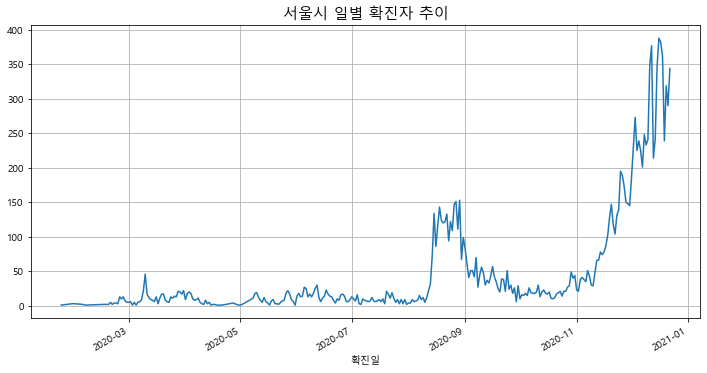

In [31]:
cdf_raw['합계'].plot(grid=True, figsize=(12,6))
plt.title('서울시 일별 확진자 추이', fontsize=15)
plt.show()

In [ ]:
cur.close()
conn.close()

### 구별 인구 데이터와 결합하기

In [32]:
pop = pd.read_csv('../static/data/cctv.csv')
pop.set_index('구별', inplace=True)
pop.head()

소계      최근증가율     인구수     내국인    외국인    고령자     외국인비율      고령자비율  \
구별                                                                        
강남구  5221  52.171379  544085  539235   4850  73942  0.891405  13.590156   
강동구  1879  82.960078  462275  458058   4217  68798  0.912228  14.882483   
강북구  1265  83.068017  313550  309996   3554  62951  1.133472  20.076862   
강서구  1617  77.887789  589536  583544   5992  88052  1.016393  14.935814   
관악구  3985  99.150425  514555  498574  15981  78206  3.105790  15.198764   

       cctv비율           오차  
구별                          
강남구  0.959593  2579.013268  
강동구  0.406468   526.315431  
강북구  0.403444   710.063146  
강서구  0.274284  1156.473682  
관악구  0.774456  1428.441743

In [33]:
pop_corona = pd.DataFrame({'확진자수':cdfT['합계']})
pop_corona['인구수'] = pop['인구수']
pop_corona.head()

확진자수     인구수
gu               
강남구   835  544085
강동구   502  462275
강북구   358  313550
강서구  1179  589536
관악구   858  514555

In [34]:
pop_corona['천명당 확진자 수'] = pop_corona['확진자수'] / pop_corona['인구수'] * 1000
pop_corona.head()

확진자수     인구수  천명당 확진자 수
gu                          
강남구   835  544085   1.534687
강동구   502  462275   1.085934
강북구   358  313550   1.141764
강서구  1179  589536   1.999878
관악구   858  514555   1.667460

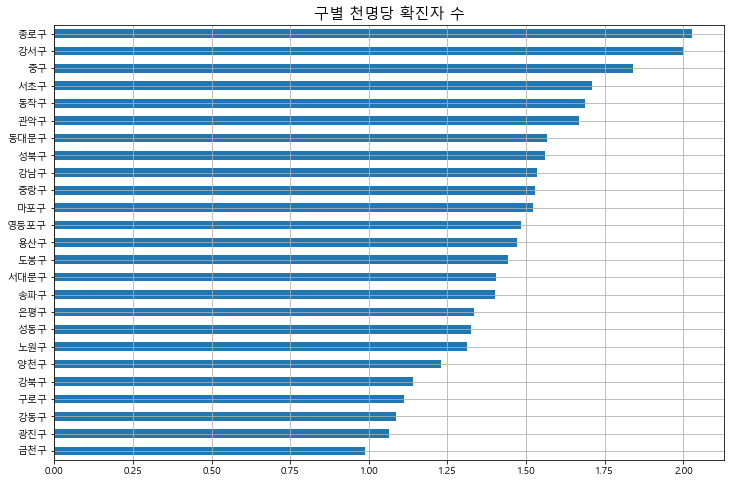

In [35]:
pop_corona['천명당 확진자 수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 천명당 확진자 수', fontsize=15)
plt.ylabel('')
plt.show()

In [39]:
cdfT['인구수'] = pop['인구수']
cdfT.head()

1월  2월  3월  4월  5월  6월  7월   8월   9월  10월  11월  12월    합계     인구수
gu                                                                    
강남구   0   8  36  21  11   7  15   89   82   88  163  315   835  544085
강동구   0   4   6   3  11  11  14   94   42   19   73  225   502  462275
강북구   0   0   5   0   9  10   4   85   31   15   41  158   358  313550
강서구   1   1  20   4  20  33  25  115   64   22  303  571  1179  589536
관악구   0   4  30   9  16  59  27  109  136   86   72  310   858  514555

### 지도 시각화

In [36]:
import folium
import json
geo_data = json.load(open('../static/data/skorea_municipalities_geo_simple.json',
                         encoding='utf8'))

In [37]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_data,
               data = pop_corona['확진자수'],
               columns = [pop_corona.index, pop_corona['확진자수']],
               fill_color = 'PuRd',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>누적 확진자수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [38]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_data,
               data = pop_corona['천명당 확진자 수'],
               columns = [pop_corona.index, pop_corona['천명당 확진자 수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>천명당 확진자 수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map